In [1]:
import requests
import time
import re
import pandas as pd
from bs4 import BeautifulSoup
from collections import Counter

#워드클라우드 다운 링크 : https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud

In [2]:
!pip install konlpy

from konlpy.tag import Kkma
from konlpy.utils import pprint
from konlpy.tag import Hannanum
from konlpy.tag import Okt

     |████████████████████████████████| 19.4 MB 6.5 MB/s 
     |████████████████████████████████| 448 kB 71.8 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [3]:
# 참고 사이트 https://yeo0.github.io/data/2018/09/24/5.-%EB%A1%9C%EA%B7%B8%EC%9D%B8%EC%9D%B4-%ED%95%84%EC%9A%94%ED%95%9C-%EC%82%AC%EC%9D%B4%ED%8A%B8%EC%97%90%EC%84%9C%EC%9D%98-%ED%81%AC%EB%A1%A4%EB%A7%81/
# 참고 사이트 2 https://hashcode.co.kr/questions/9084/%EC%9E%A1%ED%94%8C%EB%9E%98%EB%8B%9B-%EB%A1%9C%EA%B7%B8%EC%9D%B8-%ED%9B%84-%EC%8A%A4%ED%81%AC%EB%A0%88%EC%9D%B4%ED%95%91-%EB%AC%B8%EC%9D%98%EB%93%9C%EB%A6%BD%EB%8B%88%EB%8B%A4-%E3%85%9C%E3%85%9C

# 로그인 할 url
url = "https://www.jobplanet.co.kr/users/sign_in?_nav=gb"
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36'
headers = {'Content-type': 'application/json', 'Accept': 'text/plain', 'User-Agent':user_agent}
login_data = {'user':{'email':'hsmy31@hanyang.ac.kr', 'password':'rhkwpgksmswnd!', 'remember_me':'true'}}
session = requests.session()

# 로그인 실행
login_response = session.post(url, json = login_data, headers = headers)

In [4]:
def ind_reviews(code):
    url = "https://www.jobplanet.co.kr/reviews?&industry_id=" + str(code)
    response =  session.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    num = soup.find('span', class_='num') # 리뷰 개수 확인
    num = int(num.get_text().strip())
    import math, random
    pages = math.ceil(num / 10)
    page = random.sample(range(1, pages),30)
    reviews = {}
    for i in range(1, pages): # 페이지를 랜덤으로 하여 300개의 리뷰 추출
        time.sleep(1)
        url = "https://www.jobplanet.co.kr/reviews?&industry_id=" + str(code) + "&page="+ str(i)
        response =  session.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        label = soup.find_all('h2', class_="us_label") # 한 줄 리뷰 추출
        # 추출한 리뷰에서 태그를 제외한 텍스트만 추출하여 labels 리스트에 저장
        labels = [label.get_text().strip() for label in label[:]]
        star = soup.find_all('div', class_="star_score") # 별점이 포함된 div 추출
        # 추출한 div에서 별점을 나타내는 width 속성의 숫자로 된 부분을 stars 리스트에 저장
        stars = re.findall('[0-9]+[.]+[0-9]', str(star))
        # reviews 딕셔너리에 '리뷰: 별점' 형식으로 추가
        for j in range(len(labels)):
            reviews[labels[j][5:-1]] = stars[j].replace('.0','')
    return reviews

In [5]:
# 각 산업군의 기업 리뷰 스크래핑
reviews1 = dict(ind_reviews(1001))
reviews2 = dict(ind_reviews(900))
reviews3 = dict(ind_reviews(704))
reviews4 = dict(ind_reviews(1004))

In [ ]:
reviews1

In [7]:
#특수문자 제거
def sub(dic):
    dic = [re.sub(r"[^가-힣A-Za-z0-9]", " ", str(content)) for content in dic]
    return dic

In [8]:
#산업군 별 키워드 추출 후 리스트 생성
def extend(text):
    kkma=Kkma()
    temp=[]
    for i in text:
        temp.extend(kkma.nouns(i))
    return temp

In [9]:
Goverment=extend(sub(reviews1))
Bank=extend(sub(reviews2))
IT=extend(sub(reviews3))
Accounting=extend(sub(reviews4))

In [48]:
vocab_stopwords_Goverment=['있음','공공기관','공기업', '공공', '정부', '부처', '공무원', '기업', '업무', '회사', '직장']
vocab_stopwords_Bank=['있음','은행', '금융', '운용사', '보험사', '금융업' ,'지점', '기업', '업무', '회사', '직장']
vocab_stopwords_IT=['있음','개발자','소트트웨어','IT','기업','업무','회사','직장']
vocab_stopwords_Accounting=['있음','세무','회계','회계사','세무사','지점','법인','기업','업무','회사','직장']

In [65]:
def cnt(title):
  vocab_stopwords_title="vocab_stopwords_"+str(title)

  for i,v in enumerate(title):
    if len(v)<2:
      title.pop(i)

  for i,v in enumerate(title):
    if v in vocab_stopwords_title:
      title.pop(i)
    
  count=Counter(title)

  words = dict(count.most_common(30))
  return words

In [66]:
Goverment_vocab=cnt(Goverment)

In [67]:
Goverment_vocab

{'300개': 1,
 '80': 1,
 '과정': 1,
 '과제': 1,
 '교육': 1,
 '구성원': 1,
 '근무지': 1,
 '만족': 1,
 '민원': 1,
 '배우기': 1,
 '복지': 2,
 '부서': 1,
 '생활': 1,
 '서울근무': 1,
 '소극적': 1,
 '신규직원': 1,
 '신입': 1,
 '아르바이트': 1,
 '안됨': 1,
 '워라벨': 1,
 '월차': 1,
 '자부심': 1,
 '장점': 1,
 '전공자': 1,
 '조사': 1,
 '채무조정기구': 1,
 '최초': 1,
 '칼퇴근': 1,
 '한데': 1,
 '현장퇴근': 1}

In [69]:
Bank_vocab=cnt(Bank)

In [70]:
Bank_vocab

{'가족': 3,
 '개인적': 2,
 '규모': 4,
 '근무': 3,
 '금융': 3,
 '급여': 3,
 '기간': 2,
 '기관': 2,
 '기업': 3,
 '대기업': 3,
 '마인드': 3,
 '문화': 6,
 '배려': 2,
 '보상': 3,
 '분위기': 5,
 '사람': 14,
 '생각': 6,
 '수준': 3,
 '스타트업': 2,
 '실적': 3,
 '안정적': 3,
 '업무': 10,
 '업무강도': 3,
 '은행': 4,
 '장점': 2,
 '직원': 5,
 '직장': 6,
 '추천': 4,
 '투자': 2,
 '회사': 25}

In [53]:
IT_vocab=cnt(IT)

In [54]:
Accounting_vocab=cnt(Accounting)

In [24]:
for i,v in enumerate(Goverment):
    if len(v)<2:
        Goverment.pop(i)
        
for i,v in enumerate(Goverment):
    if v in vocab_stopwords_Goverment:
        Goverment.pop(i)

count=Counter(Goverment)

words = dict(count.most_common(30))
words

{'가능': 4,
 '개인': 4,
 '경험': 9,
 '계약': 3,
 '계약직': 4,
 '근무': 7,
 '기관': 10,
 '노력': 3,
 '다양': 5,
 '박사': 3,
 '보장': 3,
 '복지': 10,
 '본인': 4,
 '분위기': 11,
 '사람': 9,
 '생각': 3,
 '수평적': 6,
 '안정적': 6,
 '워라': 4,
 '워라벨': 3,
 '자부심': 3,
 '자유': 4,
 '정규직': 4,
 '조직': 3,
 '중앙': 3,
 '지도': 3,
 '직원': 9,
 '집단': 4,
 '편안': 3,
 '환경': 6}

In [25]:
!apt-get install
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...


In [26]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanu

In [27]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib 
from matplotlib import rc

path ='/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'
font_name=fm.FontProperties(fname=path,size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


# Word Cloud 

In [46]:
from google.colab import files
uploaded=files.upload()

Saving chinese-coin.png to chinese-coin.png


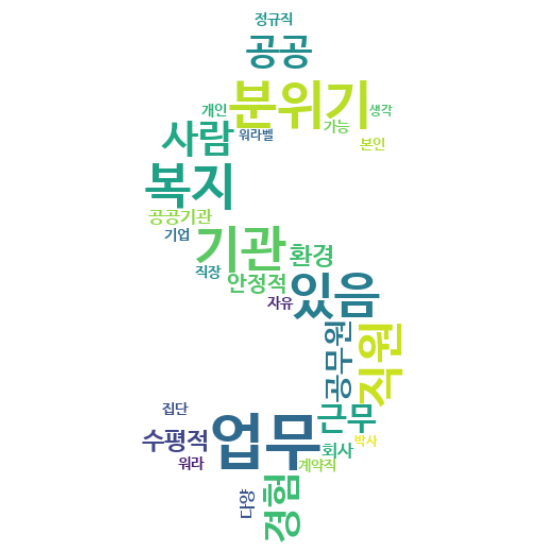

In [40]:
from PIL import Image
import numpy as np

icon=Image.open('dollar-symbol.png')
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', 
               background_color='white',                              #배경색
               width=1500, height=1000,                              #사이즈설정 
                mask=mask
              )                                                       #마스크설정   
 
cloud = wc.generate_from_frequencies(Goverment_vocab)                      #사전형태의 데이터
 
plt.figure(figsize=(10,10))                                           #액자사이즈설정
plt.axis('off')                                                       #테두리 선 없애기
plt.imshow(cloud,interpolation="bilinear")

In [35]:
 def wcloud(imagetext,text):
  icon=Image.open(imagetext)
  mask = Image.new("RGB", icon.size, (255,255,255))
  mask.paste(icon,icon)
  mask = np.array(mask)

  wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', 
                 background_color='white',                              #배경색
                 width=1500, height=1000,                              #사이즈설정 
                  mask=mask
                )                                                       #마스크설정   
 
  cloud = wc.generate_from_frequencies(text)                      #사전형태의 데이터
 
  plt.figure(figsize=(10,10))                                           #액자사이즈설정
  plt.axis('off')                                                       #테두리 선 없애기
  plt.imshow(cloud,interpolation="bilinear")

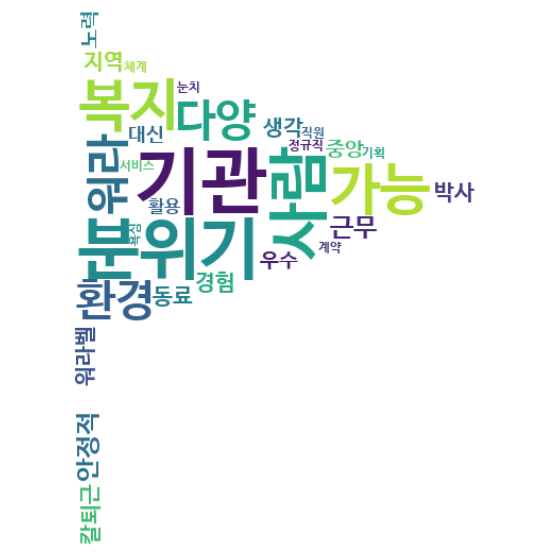

In [55]:
wcloud("free-icon-flag-727573.png",Goverment_vocab)

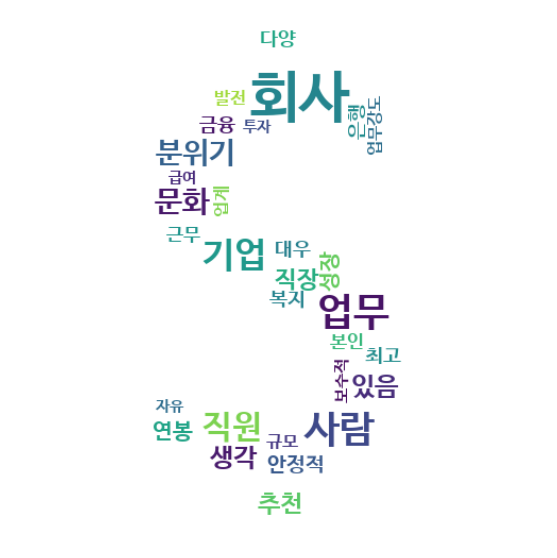

In [56]:
wcloud("dollar-symbol.png",Bank_vocab)

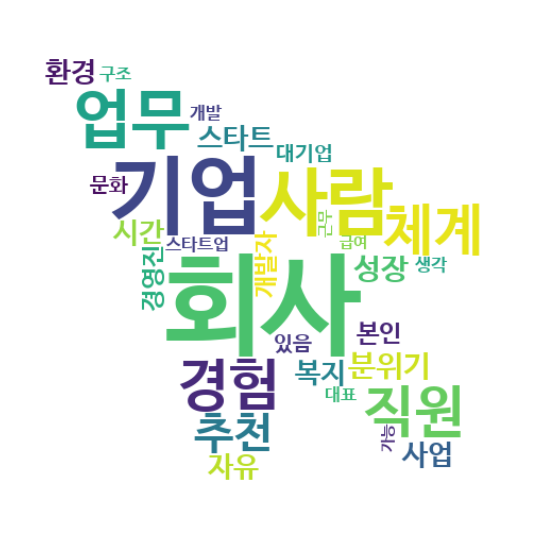

In [57]:
wcloud("cursor.png",IT_vocab)

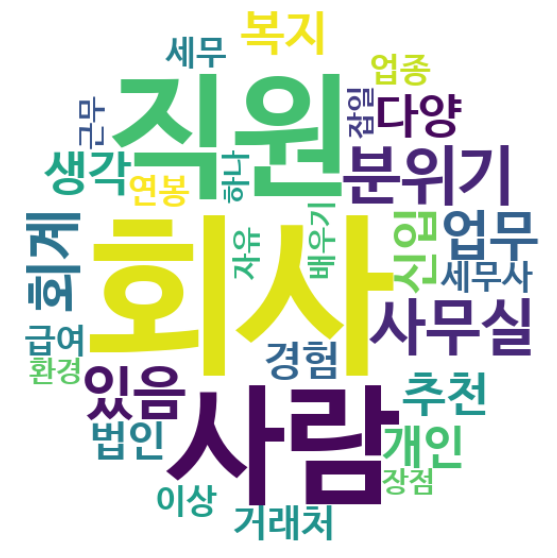

In [58]:
wcloud("chinese-coin.png",Accounting_vocab)